# Companion Notebook for Assignment 1: Processing Data in Python


## Getting started with pandas

We start by importing the libraries we're going to use: `pandas` and `matplotlib`

In [7]:
import pandas as pd
%matplotlib inline

## Loading data into a DataFrame

The pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes. It's basically a spreadsheet you can program and it's an incredibly useful Python object for data analysis. 

You can load data into a dataframe using pandas' excellent `read_*` functions.

We're going to try two of them: read_csv and read_sql.

*Pro tip*: Jupyter will output the docstring (i.e., source code comments) for a command just by asking it a question.

In [2]:
pd.read_sql?
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

Now let's read data in from a CSV file:

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv')

## Viewing your dataframe

You can use `head` and `tail` to get a view of your data.

In [11]:
df.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
0,72.0,M,f,f,f,f,f,f,f,f,...,0.6,y,15.0,y,1.48,y,10.0,n,NaN,hypothyroid
1,15.0,F,t,f,f,f,f,f,f,f,...,1.7,y,19.0,y,1.13,y,17.0,n,NaN,hypothyroid
2,24.0,M,f,f,f,f,f,f,f,f,...,0.2,y,4.0,y,1.00,y,0.0,n,NaN,hypothyroid
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid


In [13]:
df.tail

<bound method NDFrame.tail of        Age Sex On Thyroxine Query on Thyroxine On Antithyroid Medication  \
0     72.0   M            f                  f                         f   
1     15.0   F            t                  f                         f   
2     24.0   M            f                  f                         f   
3     24.0   F            f                  f                         f   
4     77.0   M            f                  f                         f   
...    ...  ..          ...                ...                       ...   
3158  58.0   F            f                  f                         f   
3159  29.0   F            f                  f                         f   
3160  77.0   M            f                  f                         f   
3161  74.0   F            f                  f                         f   
3162  56.0   F            t                  f                         f   

     Thyroid Surgery Query Hypothyroid Query Hyperthyroid

We can get a sense for the size and shape of the data using `shape`

In [15]:
df.shape

(3163, 26)

## Columns

Columns typically represent features of a given instance or record in the dataframe. You can use the `.columns` attribute to print a list of all columns:

In [11]:
df.columns

Index(['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Thyroid Surgery', 'Query Hypothyroid',
       'Query Hyperthyroid', 'Pregnant', 'Sick', 'Tumor', 'Lithium', 'Goitre',
       'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4',
       'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG',
       'Class'],
      dtype='object')

Get a sense for the type of each column using `dtypes`:

In [13]:
df.dtypes

Age                          float64
Sex                           object
On Thyroxine                  object
Query on Thyroxine            object
On Antithyroid Medication     object
Thyroid Surgery               object
Query Hypothyroid             object
Query Hyperthyroid            object
Pregnant                      object
Sick                          object
Tumor                         object
Lithium                       object
Goitre                        object
TSH Measured                  object
TSH                          float64
T3 Measured                   object
T3                           float64
TT4 Measured                  object
TT4                          float64
T4U Measured                  object
T4U                          float64
FTI Measured                  object
FTI                          float64
TBG Measured                  object
TBG                          float64
Class                         object
dtype: object

To access a single column as a series, you can reference its name as a string in square brackets:

In [15]:
df['On Antithyroid Medication']

0       f
1       f
2       f
3       f
4       f
       ..
3158    f
3159    f
3160    f
3161    f
3162    f
Name: On Antithyroid Medication, Length: 3163, dtype: object

<Axes: xlabel='Thyroid Surgery'>

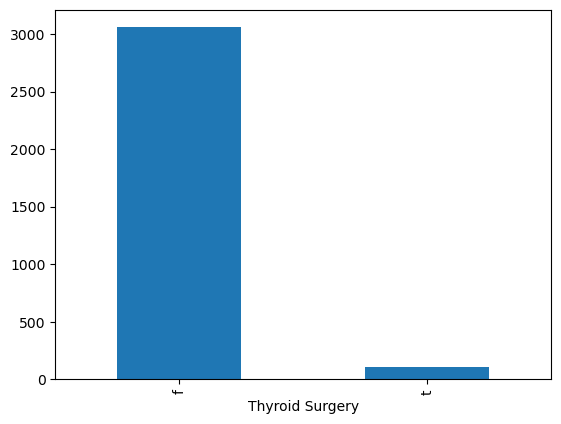

In [33]:
df['Thyroid Surgery'].value_counts().plot(kind='bar')

To plot a series, use the `.plot()` function

To access multiple columns as a dataframe, you can use a list of column names:

In [103]:
df[['On Antithyroid Medication', 'Thyroid Surgery']]

,On Antithyroid Medication,Thyroid Surgery
0,f,f
1,f,f
2,f,f
3,f,f
4,f,f
...,...,...
3158,f,f
3159,f,f
3160,f,f
3161,f,f


## Basic views into the data

Lets get a better sense what these fields look like. 

Let's start by describing the entire dataset using the `describe` function.

In [35]:
df.describe()

,Age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


It looks like `describe` only works on numerical columns. For categorical data, we can use `value_counts` to check one column at a type:

In [105]:
df['On Antithyroid Medication'].value_counts()

f    3121
t      42
Name: On Antithyroid Medication, dtype: int64

Value counts is also useful for plotting data:

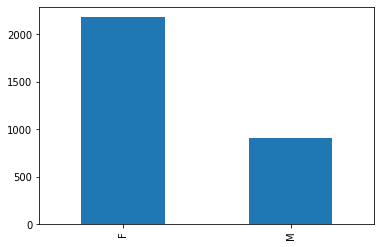

In [106]:
df['Sex'].value_counts().plot(kind='bar')

<span style="color:red">An addition to the original Notebook.</span>
## Another way to create a bar plot:
Use the 'seaborn' package to add more options to the plot

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Set the style for the plots
sns.set(style="whitegrid")

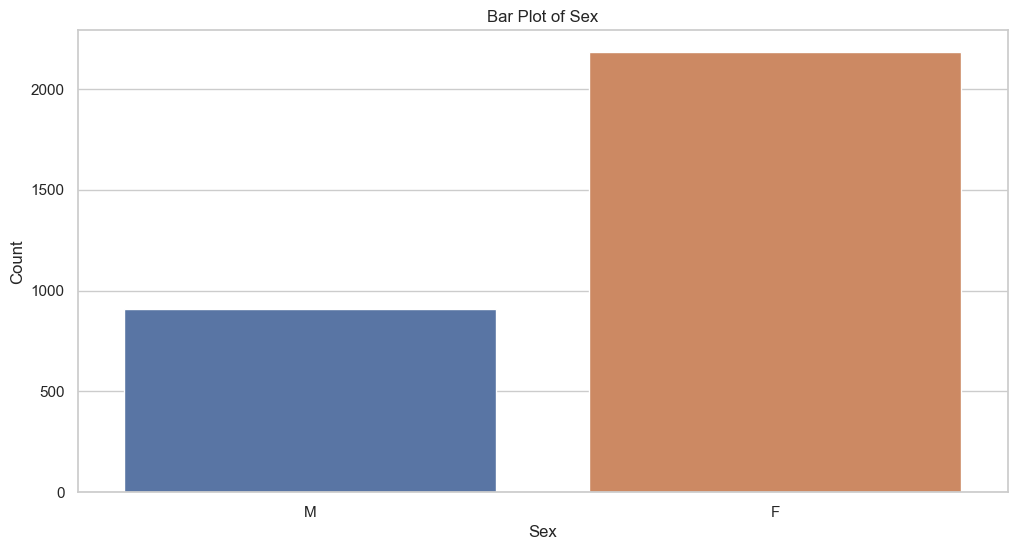

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sex')
plt.title('Bar Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The `normalize=True` option will give us the fraction of all instances that have each value.

In [37]:
df['On Antithyroid Medication'].value_counts(normalize=True)

On Antithyroid Medication
f    0.986721
t    0.013279
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

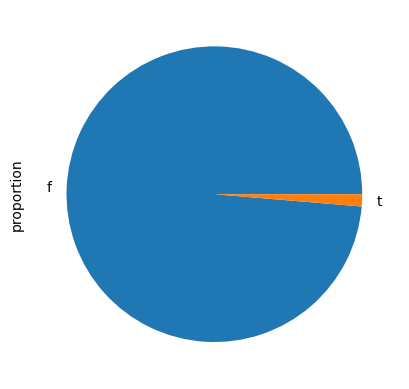

In [39]:
df['On Antithyroid Medication'].value_counts(normalize=True).plot(kind='pie')

Let's see if there are missing values for age in this dataset.

In [17]:
pd.value_counts(df['Age'].isnull())

C:\Users\vkuskova\AppData\Local\Temp\ipykernel_5592\4277240279.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Age'].isnull())


Age
False    2717
True      446
Name: count, dtype: int64

<span style="color:red">An addition to the original Notebook.</span>
### Another way to do the same (or avoid the error above)

In [19]:
missing_values = df['Age'].isnull().sum()
print(f"Number of missing values in 'age' column: {missing_values}")

Number of missing values in 'age' column: 446


What if we wanted to fill or drop the missing values? We can use `fillna` and `dropna`

In [21]:
df['Age'] = df['Age'].fillna(-1)

In [23]:
pd.value_counts(df['Age'].isnull())

C:\Users\vkuskova\AppData\Local\Temp\ipykernel_5592\4277240279.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Age'].isnull())


Age
False    3163
Name: count, dtype: int64

<span style="color:red">An addition to the original Notebook.</span>
## Additional plots of data

Let's see what other plots we can create on our **Hypothyroid** dataset.

### Plots Included
- Violin Plot of Age by Sex
- Line Plot of T3 Levels by Age
- Scatter Plot of TSH Levels by Age
- Box Plot of TT4 Levels by Sex

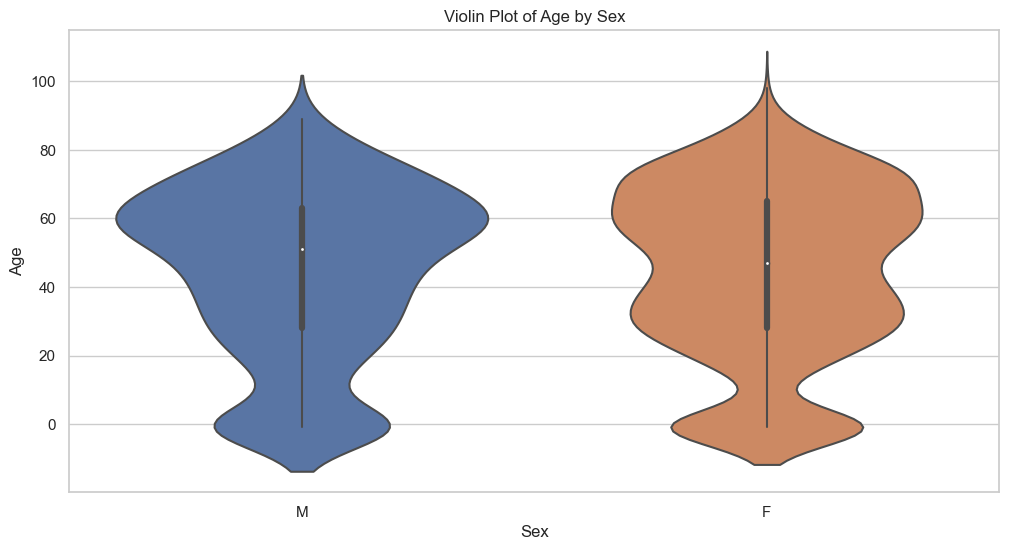

In [35]:
#Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Sex', y='Age')
plt.title('Violin Plot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

C:\Users\vkuskova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vkuskova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


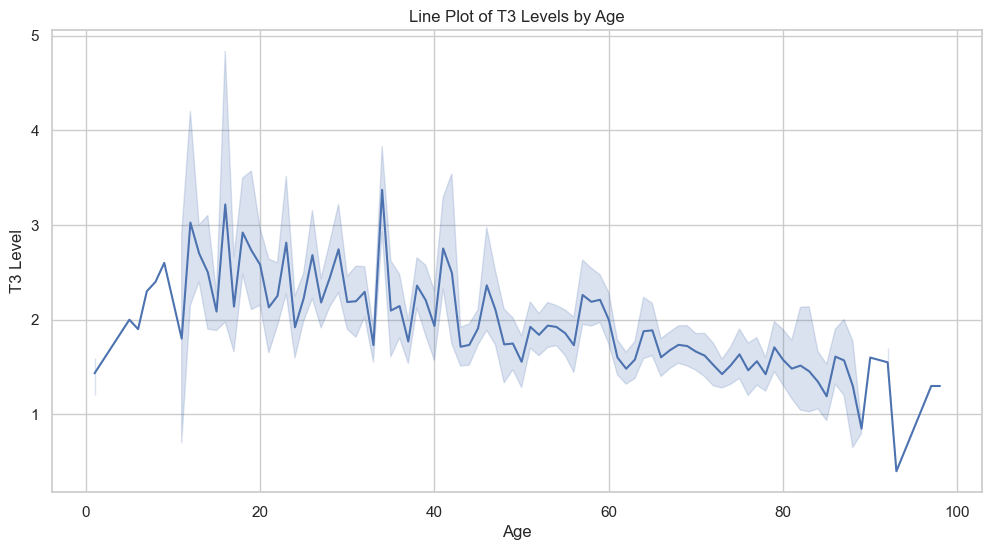

In [49]:
# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age', y='T3')
plt.title('Line Plot of T3 Levels by Age')
plt.xlabel('Age')
plt.ylabel('T3 Level')
plt.show()

The code above generated an error. *Deprecated* code is quite common, so we can address the issue by making the fix that Python is asking for:

In [75]:
import numpy as np
import warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#warnings.filterwarnings('ignore', category=FutureWarning, message="use_inf_as_na option is deprecated")

Let's try to run the code again:

C:\Users\vkuskova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vkuskova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


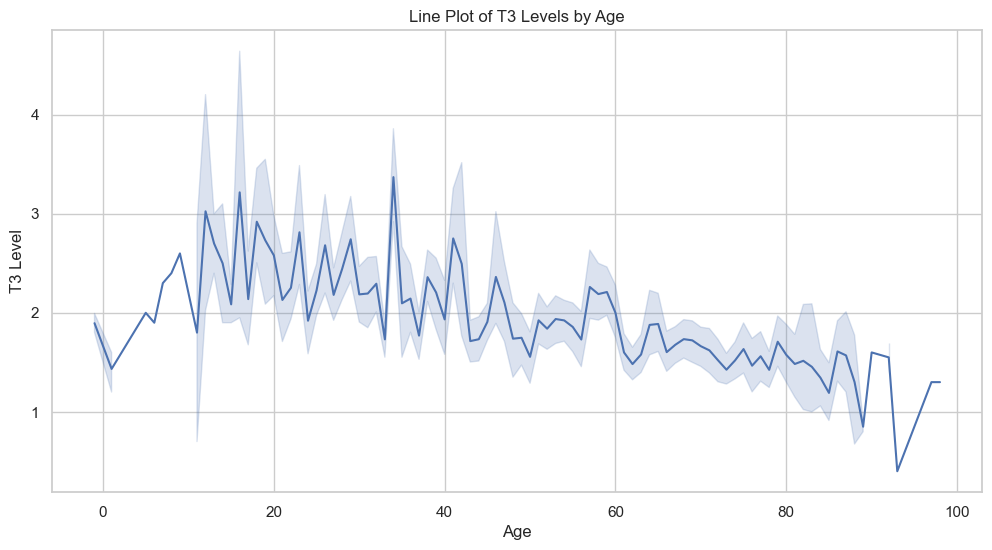

In [37]:
# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age', y='T3')
plt.title('Line Plot of T3 Levels by Age')
plt.xlabel('Age')
plt.ylabel('T3 Level')
plt.show()

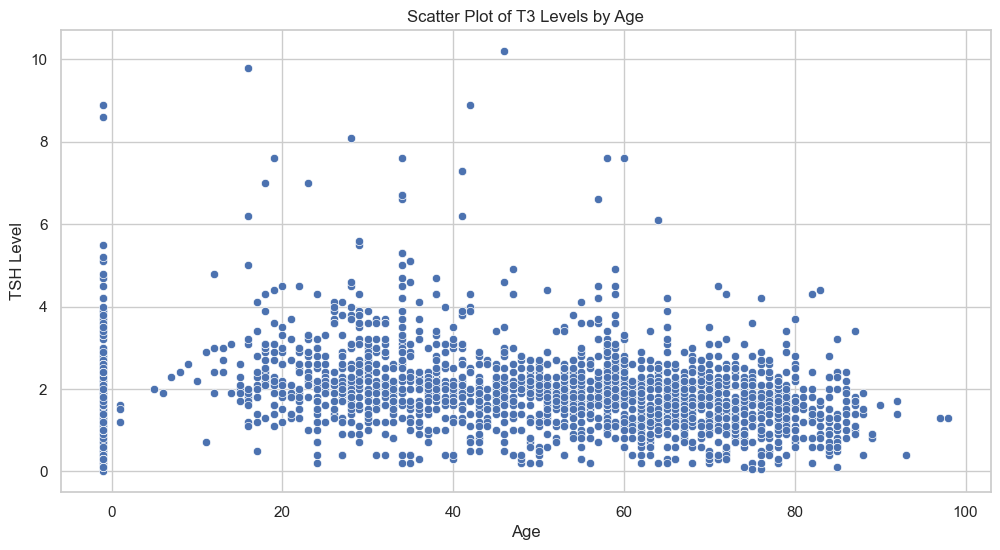

In [43]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='T3')
plt.title('Scatter Plot of T3 Levels by Age')
plt.xlabel('Age')
plt.ylabel('TSH Level')
plt.show()

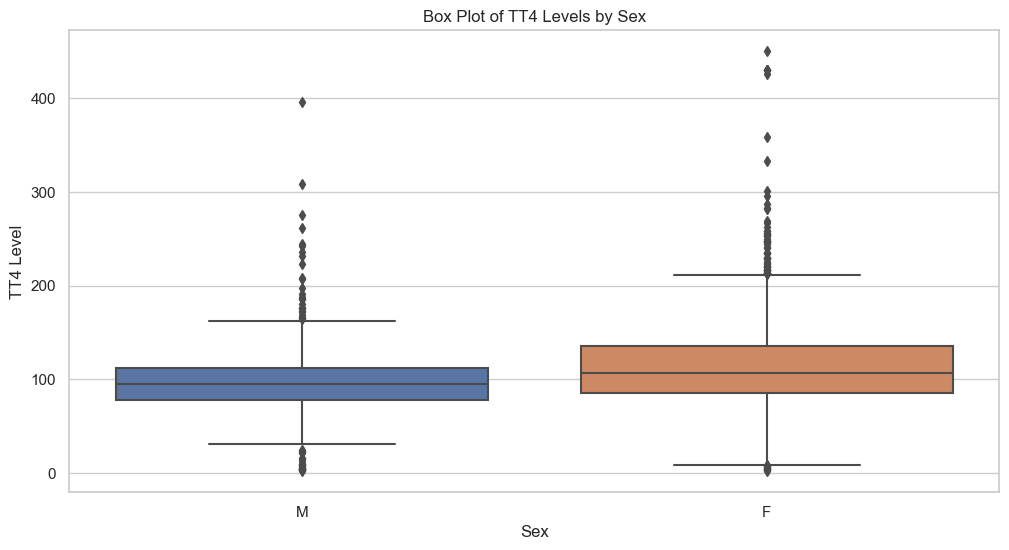

In [83]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sex', y='TT4')
plt.title('Box Plot of TT4 Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('TT4 Level')
plt.show()

## Selecting and Subsetting Data

Let's say we just wanted to work with the cases where the individual's age is unrecorded. We can subset using conditional logic.

In [71]:
df[df['Age'] == -1]

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
26,-1.0,M,f,f,f,t,f,f,f,f,...,1.0,y,32.0,y,0.78,y,41.0,n,NaN,hypothyroid
44,-1.0,F,f,f,f,f,f,f,f,f,...,1.4,y,78.0,y,0.98,y,80.0,n,NaN,hypothyroid
50,-1.0,F,f,f,f,f,f,f,f,f,...,0.4,y,9.7,y,1.46,y,6.6,n,NaN,hypothyroid
59,-1.0,NaN,f,f,f,f,f,f,f,f,...,0.6,y,21.0,y,0.97,y,22.0,n,NaN,hypothyroid
61,-1.0,F,f,f,f,f,f,f,f,f,...,0.3,y,18.0,y,1.06,y,17.0,n,NaN,hypothyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,-1.0,M,f,f,f,f,f,f,f,f,...,2.4,y,109.0,y,1.12,y,97.0,n,NaN,negative
3143,-1.0,F,f,f,f,f,f,f,f,f,...,1.0,y,58.0,y,0.87,y,67.0,n,NaN,negative
3146,-1.0,F,f,f,f,f,f,t,f,f,...,1.8,y,61.0,y,0.82,y,74.0,n,NaN,negative
3149,-1.0,NaN,f,f,f,f,f,f,f,f,...,2.0,y,118.0,y,1.04,y,113.0,n,NaN,negative


You can retrieve parts, or slices, of a series or dataframe by range using the [] operator - just like in Python lists.

In [73]:
df[3:6]
# equivalent to df.iloc[3:6]

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid
5,85.0,F,f,f,f,f,t,f,f,f,...,1.1,y,27.0,y,1.19,y,23.0,n,NaN,hypothyroid


You can also use `loc` to slice both rows and columns by text labels, or `iloc` to slice by integer positions. For example:

In [77]:
df.loc[3:6] # print all columns

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid
5,85.0,F,f,f,f,f,t,f,f,f,...,1.1,y,27.0,y,1.19,y,23.0,n,NaN,hypothyroid
6,64.0,F,f,f,f,t,f,f,f,f,...,1.3,y,54.0,y,0.86,y,63.0,n,NaN,hypothyroid


In [47]:
df.loc[3:6, 'Age'] # print a slice of one column

3    24.0
4    77.0
5    85.0
6    64.0
Name: Age, dtype: float64

In [81]:
df.iloc[3:6, 0] # print a slice of column 0 (Age)

3    24.0
4    77.0
5    85.0
Name: Age, dtype: float64

## Exporting data

Pandas supports saving DataFrames to a variety of file formats using the `to_*` function. Let's save our updated data as a csv.

In [83]:
df.to_csv("hypothyroid_1.csv")

## Groupby

Often we want to examine difference among groups based on categorical values. For this `groupby` is incredibly valuable

In [115]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df.groupby('Sex').mean()

,Age,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,Tumor,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
Sex,,,,,,,,,,,,,,,,,,,,,


In [99]:
grouped_data = df.groupby('Sex')
for sex, group in grouped_data:
    print(f"\nGroup: {sex}")
    print(group)


Group: F
       Age Sex On Thyroxine Query on Thyroxine On Antithyroid Medication  \
1     15.0   F            t                  f                         f   
3     24.0   F            f                  f                         f   
5     85.0   F            f                  f                         f   
6     64.0   F            f                  f                         f   
7     72.0   F            f                  f                         f   
...    ...  ..          ...                ...                       ...   
3157  69.0   F            f                  f                         f   
3158  58.0   F            f                  f                         f   
3159  29.0   F            f                  f                         f   
3161  74.0   F            f                  f                         f   
3162  56.0   F            t                  f                         f   

     Thyroid Surgery Query Hypothyroid Query Hyperthyroid Pregnant Sick  ... 

In [113]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
means_by_sex = df.groupby('Sex').mean()
print(means_by_sex)

Empty DataFrame
Columns: [Age, On Thyroxine, Query on Thyroxine, On Antithyroid Medication, Thyroid Surgery, Query Hypothyroid, Query Hyperthyroid, Pregnant, Sick, Tumor, Lithium, Goitre, TSH Measured, TSH, T3 Measured, T3, TT4 Measured, TT4, T4U Measured, T4U, FTI Measured, FTI, TBG Measured, TBG, Class]
Index: []

[0 rows x 25 columns]


## Data munging functions

pandas provides a variety of other useful functions, including:

```
pivot
pivot_tables
stack/unstack
melt
get_dummies
factorize
```

<span style="color:red">An addition to the original Notebook.</span>
Let's look at examples of some of these functions. 

Pivot Table: pivot_table is used to summarize data. Here, we create a pivot table to find the mean age for each sex.


In [90]:
print("\nPivot Table (mean age by sex):")
pivot_table = df.pivot_table(values='Age', index='Sex', aggfunc='mean')
print(pivot_table)


Pivot Table (mean age by sex):
           Age
Sex           
F    51.127816
M    51.442478


Stack/Unstack: stack converts a wide DataFrame into a long DataFrame (pivot the columns into rows). Unstack converts a long DataFrame into a wide DataFrame (pivot the rows into columns).

In [104]:
# First, create a simple pivot table
simple_pivot = df.pivot_table(values='Age', index='Sex', columns='T3', aggfunc='mean')

# Stack the pivot table
print("\nStacked Pivot Table:")
stacked = simple_pivot.stack()
print(stacked)

# Unstack the pivot table
print("\nUnstacked Pivot Table:")
unstacked = stacked.unstack()
print(unstacked)


Stacked Pivot Table:
Sex  T3  
F    0.05    75.500000
     0.10    74.000000
     0.20    61.230769
     0.30    58.777778
     0.40    55.250000
               ...    
M    4.60    35.000000
     4.70    34.000000
     4.90    59.000000
     6.20    41.000000
     7.60    47.000000
Length: 113, dtype: float64

Unstacked Pivot Table:
T3   0.05   0.10       0.20       0.30   0.40       0.50     0.60       0.70   \
Sex                                                                             
F     75.5   74.0  61.230769  58.777778  55.25  69.500000  73.9375  63.652174   
M      NaN   85.0  53.600000  68.285714  53.00  43.666667  65.7500  60.545455   

T3       0.80       0.90   ...  6.20   6.60   6.70   7.00   7.30   7.60   \
Sex                        ...                                             
F    64.555556  65.103448  ...   16.0   45.5   34.0   20.5   41.0   38.5   
M    70.307692  62.944444  ...   41.0    NaN    NaN    NaN    NaN   47.0   

T3   8.10   8.90   9.80   10.20  

Melt: melt is used to unpivot a DataFrame from wide format to long format. Here, it transforms the DataFrame so that age, T3, and TSH become variable values.

In [110]:
print("\nMelted Data (making the DataFrame longer):")
melted = pd.melt(df, id_vars=['Sex'], value_vars=['Age', 'T3', 'TSH'])
print(melted.head())


Melted Data (making the DataFrame longer):
  Sex variable  value
0   M      Age   72.0
1   F      Age   15.0
2   M      Age   24.0
3   F      Age   24.0
4   M      Age   77.0


Get Dummies: get_dummies is used to convert categorical variables into dummy/indicator variables. Here, it converts the sex column into dummy variables.

In [113]:
print("\nData with Dummy Variables:")
dummies = pd.get_dummies(df, columns=['Sex'])
print(dummies.head())


Data with Dummy Variables:
    Age On Thyroxine Query on Thyroxine On Antithyroid Medication  \
0  72.0            f                  f                         f   
1  15.0            t                  f                         f   
2  24.0            f                  f                         f   
3  24.0            f                  f                         f   
4  77.0            f                  f                         f   

  Thyroid Surgery Query Hypothyroid Query Hyperthyroid Pregnant Sick Tumor  \
0               f                 f                  f        f    f     f   
1               f                 f                  f        f    f     f   
2               f                 f                  f        f    f     f   
3               f                 f                  f        f    f     f   
4               f                 f                  f        f    f     f   

   ...   TT4 T4U Measured   T4U  FTI Measured   FTI  TBG Measured TBG  \
0  ...  15.0   

Factorize: factorize encodes the unique values in a column as integers. Here, it encodes the sex column into integer values, with unique_values holding the mapping of the original values.

In [120]:
print("\nFactorized 'Sex' Column:")
df['Sex_factorized'], unique_values = pd.factorize(df['Sex'])
print(df[['Sex', 'Sex_factorized']].head())
print("Unique Values:", unique_values)


Factorized 'Sex' Column:
  Sex  Sex_factorized
0   M               0
1   F               1
2   M               0
3   F               1
4   M               0
Unique Values: Index(['M', 'F'], dtype='object')


## Grouping and plotting!

In [111]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
grouped = df[['Age', 'Sex', 'TSH']].groupby('Age').mean()
print(grouped)

        Sex        TSH
Age                   
-1.0   0.30   5.382005
 1.0   0.75   0.533333
 4.0   0.00   0.400000
 5.0   0.00  17.000000
 6.0   0.50   4.050000
...     ...        ...
 90.0  0.00   0.900000
 92.0  0.00   0.400000
 93.0  0.00   2.700000
 97.0  0.00   3.200000
 98.0  0.00   0.000000

[93 rows x 2 columns]


<Axes: xlabel='Age'>

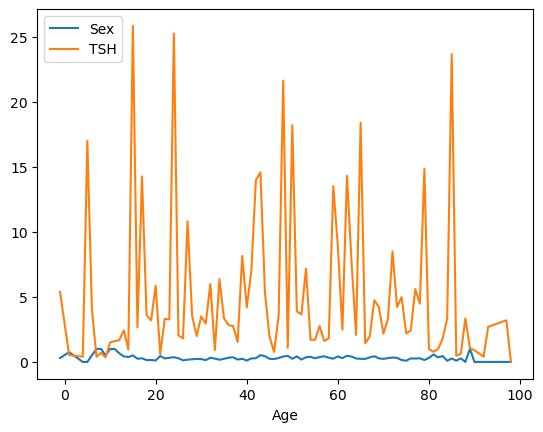

In [117]:
grouped.plot(kind='line')

<span style="color:red">An addition to the original Notebook.</span>
# Group work assignment:
1. Is the plot above the best to represent the data? Why or why not?
2. Create a plot (using one of the options shown in this book or any other plot you would like) that would represent the data better.